In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import statistics as stats 
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv('./train.csv')
df2 = pd.read_csv('./test.csv')
df3 = df2
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

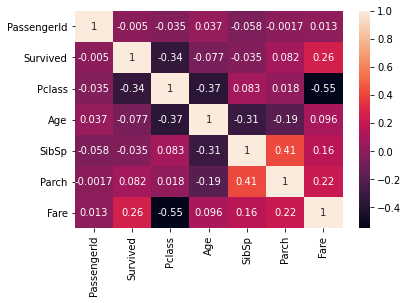

In [4]:
sb.heatmap(df1.corr(),annot=True)

In [5]:
df1 = pd.get_dummies(df1, columns= ['Embarked'], drop_first=True)
df2 = pd.get_dummies(df2, columns= ['Embarked'], drop_first=True)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


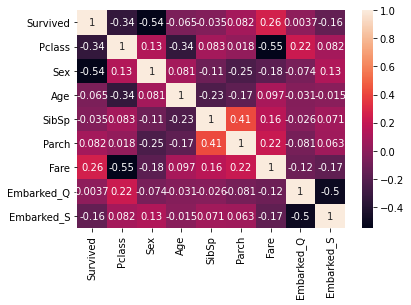

In [6]:
try:
    df1 = df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
    df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1)
    df1.Sex = df1['Sex'].replace({'male':1, 'female':0})
    df1['Age'].fillna(round(df1['Age'].median()), inplace=True) 
    df2.Sex = df2['Sex'].replace({'male':1, 'female':0})
    df2['Age'].fillna(round(df2['Age'].median()), inplace=True) 
    df2['Fare'].fillna(round(df2['Fare'].median()), inplace=True)
except:
    df1.Sex = df1['Sex'].replace({'male':1, 'female':0})
    df1['Age'].fillna(round(df1['Age'].median()), inplace=True) 
    df2.Sex = df2['Sex'].replace({'male':1, 'female':0})
    df2['Age'].fillna(round(df2['Age'].median()), inplace=True)
    df2['Fare'].fillna(round(df2['Fare'].median()), inplace=True)
sb.heatmap(df1.corr(), annot= True);
print(df2.isnull().sum())

In [7]:
X = df1.drop('Survived', axis = 1)
Y = df1.Survived
X1 = df2
X_TRAIN = X
X_TEST = X1
Y_TRAIN = Y
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)

(891, 8)
(418, 8)
(891,)


In [8]:
log_reg = linear_model.LogisticRegression(random_state= 1)
log_reg.fit(X_TRAIN,Y_TRAIN)
log_reg.score(X_TRAIN, Y_TRAIN)

C:\Users\Aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8035914702581369

In [9]:
y_pred = log_reg.predict(X_TEST)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [10]:
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleTitanic/KaggleSubmission2.csv', index = False)

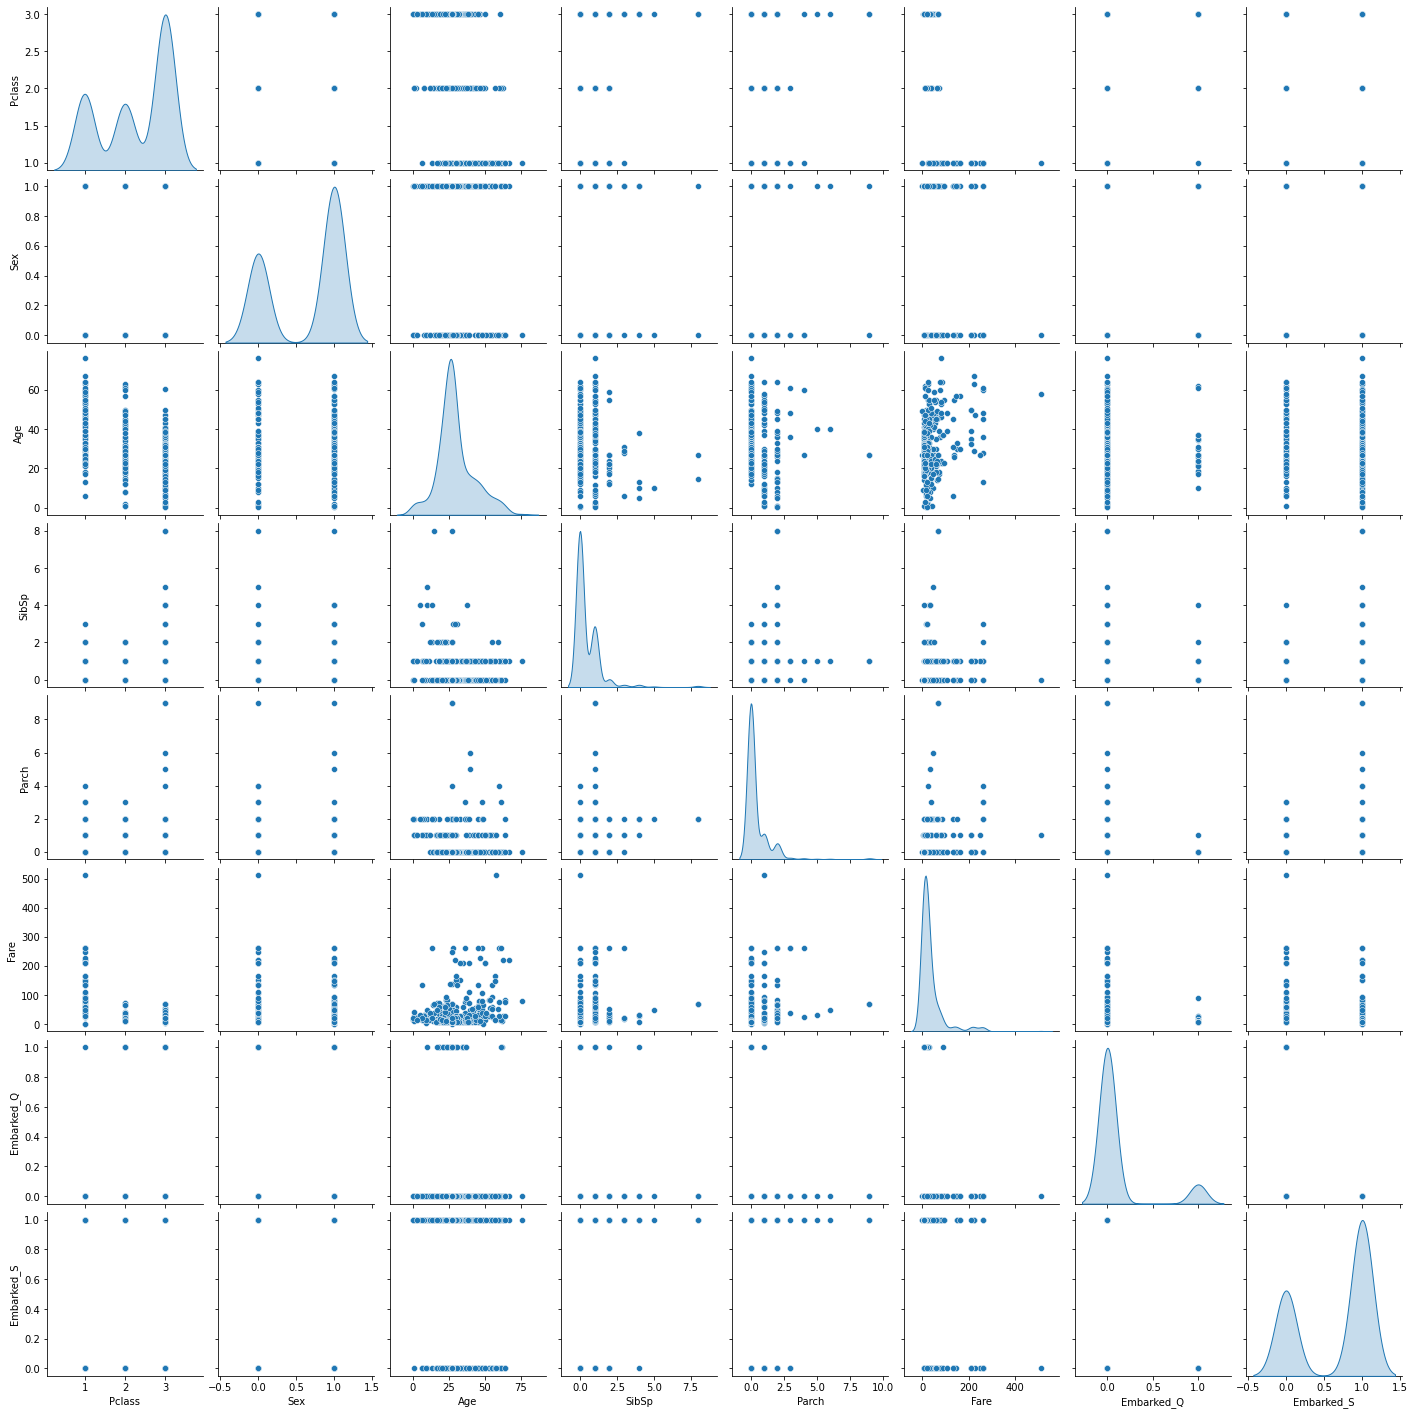

In [11]:
sb.pairplot(df2,diag_kind = 'kde');